In [2]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2

In [3]:
from keras.layers import Flatten, Dense, Input,concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout
from keras.models import Model
from keras.models import Sequential
import tensorflow as tf

In [4]:
from scipy import spatial
from tensorflow.keras.applications.vgg16 import VGG16


In [5]:
vgg16 = keras.applications.VGG16(weights="imagenet", include_top=True, pooling="max", input_shape=(224, 224, 3))

In [6]:
basemodel = Model(inputs=vgg16.input, outputs=vgg16.get_layer("fc2").output)

In [7]:
def get_feature_vector(img):
 img = cv2.resize(img, (224, 224))
 feature_vector = basemodel.predict(img.reshape(1, 224, 224, 3))
 return feature_vector

In [8]:
def calculate_similarity(vector1, vector2):
 return 1 - spatial.distance.cosine(vector1, vector2)

In [24]:
google_img1 = cv2.imread("./google_img1.jpg")
google_img2 = cv2.imread("./google_img2.jpg")
google_same_img = cv2.imread("./google_same_img.jpg")
cam_img1 = cv2.imread("./cam_img1.jpg")
cam_img_contrast = cv2.imread("./cam_img_contrast.jpg")
different_image = cv2.imread("./different_image.jpg")

In [25]:
f1 = get_feature_vector(google_img1).ravel()
f2 = get_feature_vector(google_img2).ravel()
f3 = get_feature_vector(google_same_img).ravel()
f4 = get_feature_vector(cam_img1) 
f5 = get_feature_vector(cam_img_contrast).ravel()
f6 = get_feature_vector(different_image).ravel()

1/1 [==============================] - 0s 239ms/step


Same Google Images with different angles


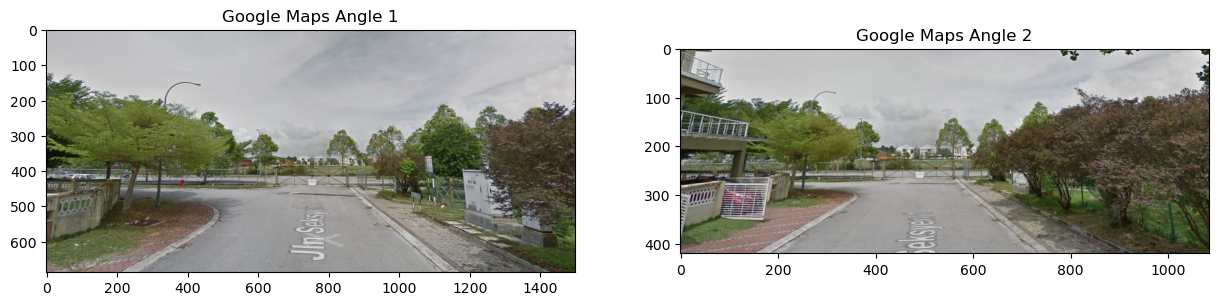

Similarity Score:


0.7432884573936462

In [11]:
print("Same Google Images with different angles")

# Display images using matplotlib
fig = plt.figure(figsize=(15, 10))

# Plot Original Image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(google_img1, cv2.COLOR_BGR2RGB))
ax1.set_title("Google Maps Angle 1")

# Plot Duplicate Image
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(google_img2, cv2.COLOR_BGR2RGB))
ax2.set_title("Google Maps Angle 2")

plt.show()

print("Similarity Score:")
calculate_similarity(f1, f2) #calculate similarity of two images

Same junction, one from Google Maps, one taken on cam


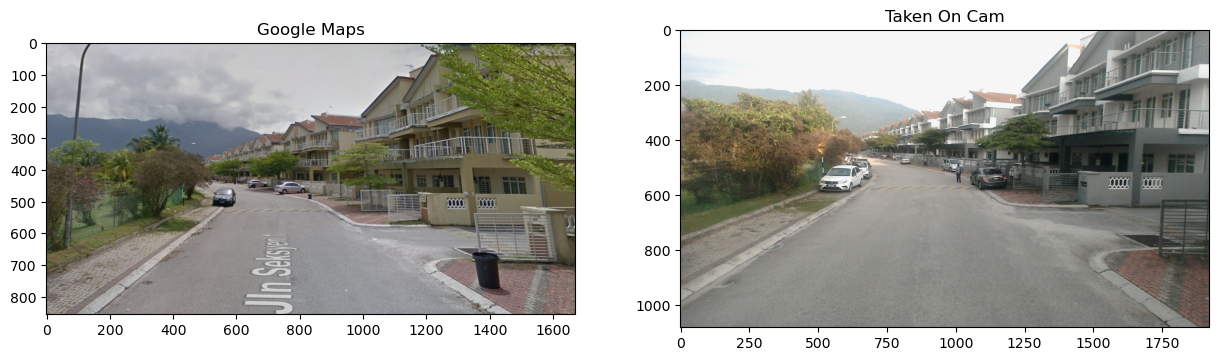

Similarity Score:


0.76921147108078

In [12]:
print("Same junction, one from Google Maps, one taken on cam")

# Display images using matplotlib
fig = plt.figure(figsize=(15, 10))

# Plot Original Image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(google_same_img, cv2.COLOR_BGR2RGB))
ax1.set_title("Google Maps")

# Plot Duplicate Image
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(cam_img1, cv2.COLOR_BGR2RGB))
ax2.set_title("Taken On Cam")

plt.show()

print("Similarity Score:")
calculate_similarity(f3, f4) #calculate similarity of two images


Same junction, one from Google Maps, one taken on cam with different contrast


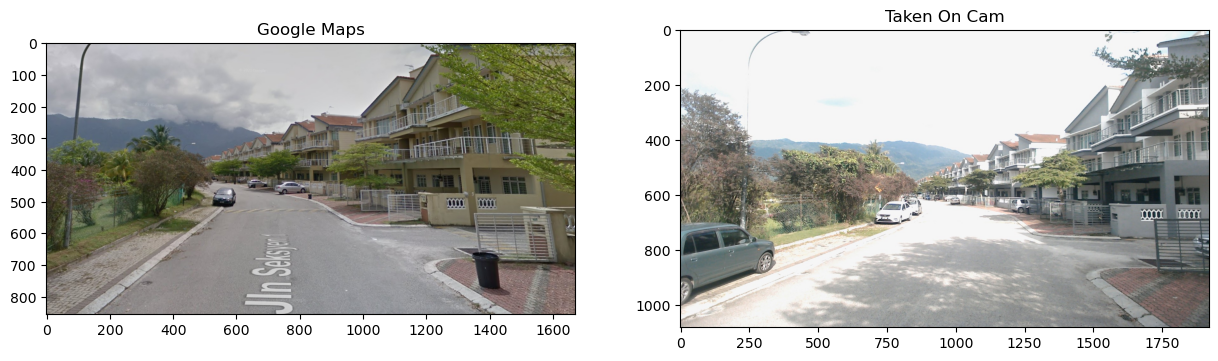

Similarity Score:


0.742610514163971

In [13]:
print("Same junction, one from Google Maps, one taken on cam with different contrast")

# Display images using matplotlib
fig = plt.figure(figsize=(15, 10))

# Plot Original Image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(google_same_img, cv2.COLOR_BGR2RGB))
ax1.set_title("Google Maps")

# Plot Duplicate Image
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(cam_img_contrast, cv2.COLOR_BGR2RGB))
ax2.set_title("Taken On Cam")

plt.show()

print("Similarity Score:")
calculate_similarity(f3, f5) #calculate similarity of two images

Different Images


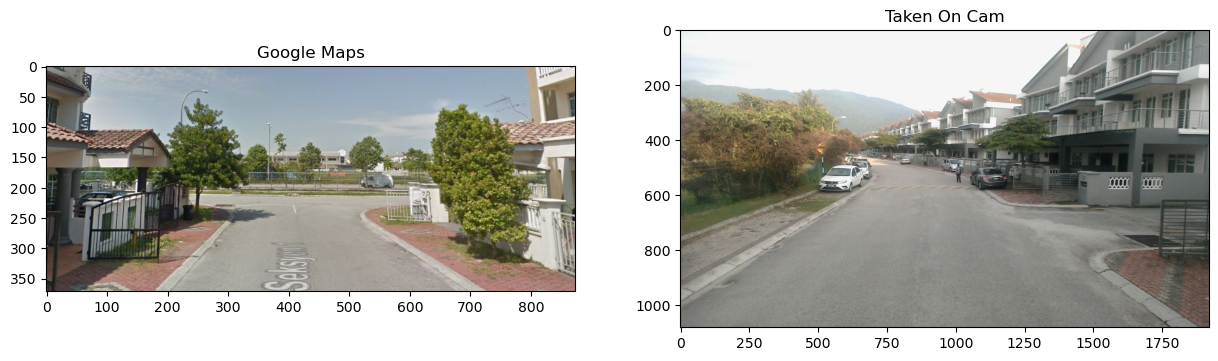

Similarity Score:


0.45413538813591003

In [17]:
print("Different Images")

# Display images using matplotlib
fig = plt.figure(figsize=(15, 10))

# Plot Original Image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(different_image, cv2.COLOR_BGR2RGB))
ax1.set_title("Google Maps")

# Plot Duplicate Image
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(cam_img1, cv2.COLOR_BGR2RGB))
ax2.set_title("Taken On Cam")

plt.show()

print("Similarity Score:")
calculate_similarity(f6, f4) #calculate similarity of two images

Different Google Images


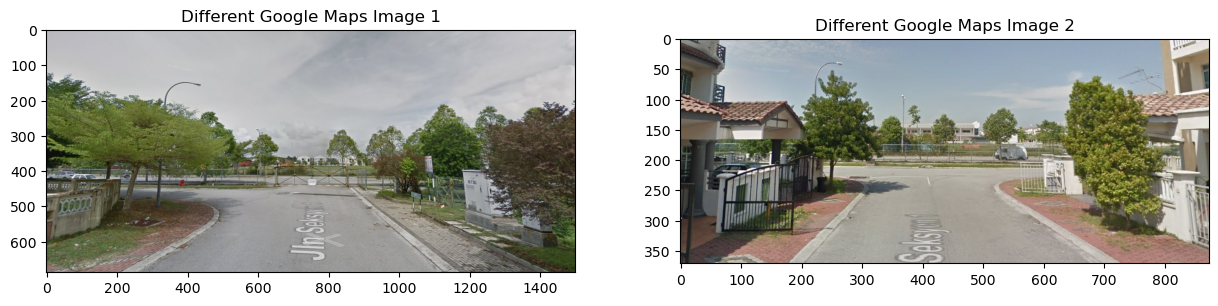

Similarity Score:


0.5264532566070557

In [19]:
print("Different Google Images")

# Display images using matplotlib
fig = plt.figure(figsize=(15, 10))

# Plot Original Image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(google_img1, cv2.COLOR_BGR2RGB))
ax1.set_title("Different Google Maps Image 1")

# Plot Duplicate Image
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(different_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Different Google Maps Image 2")

plt.show()

print("Similarity Score:")
calculate_similarity(f1, f6) #calculate similarity of two images